In [1]:
import pandas as pd
import scripts.sentiment_strategy as ss

In [2]:
ticker = "PLTR"
name = "Palantir Technologies Inc."
upper_threshold = 0.1
lower_threshold = -0.9

In [ ]:
df_scored = pd.read_csv("data/PLTR_sentiment.csv")

df_scored = ss.parse_date_raw_column(
    df_scored,
    date_col="date_raw",
    default_year=2025,
    out_col="date",
)

In [4]:
df_scored.head()    

,title,date_raw,source_code,body,sentiment,sentiment_score,sentiment_confidence,sentiment_rationale,sentiment_raw,date
0,Palantir Technologies on 'Golden Path' to Tril...,Dec. 05,MT,Palantir Technologies on 'Golden Path' to Tril...,bullish,0.7,0.9,The headline highlights Palantir's significant...,"```json\n{\n ""sentiment"": ""bullish"",\n ""scor...",2025-12-05
1,"Nvidia Sell-Off a 'DeepSeek Moment,' AI Revolu...",Nov. 21,MT,"Nvidia Sell-Off a 'DeepSeek Moment,' AI Revolu...",bearish,-0.6,0.8,The headline emphasizes a significant sell-off...,"```json\n{\n ""sentiment"": ""bearish"",\n ""scor...",2025-11-21
2,CICC Adjusts Price Target on Palantir Technolo...,Nov. 12,MT,CICC Adjusts Price Target on Palantir Technolo...,bullish,0.6,0.8,The headline indicates a price increase (from ...,"```json\n{\n ""sentiment"": ""bullish"",\n ""scor...",2025-11-12
3,Nvidia Shares Decline After SoftBank Exit as M...,Nov. 11,MT,Nvidia Shares Decline After SoftBank Exit as M...,bearish,-0.6,0.8,The headline highlights a significant negative...,"```json\n{\n ""sentiment"": ""bearish"",\n ""scor...",2025-11-11
4,America's markets lose their nerve,Nov. 07,Zonebourse,America's markets lose their nerve,bearish,-0.8,0.7,The headline 'America's markets lose their ner...,"```json\n{\n ""sentiment"": ""bearish"",\n ""scor...",2025-11-07


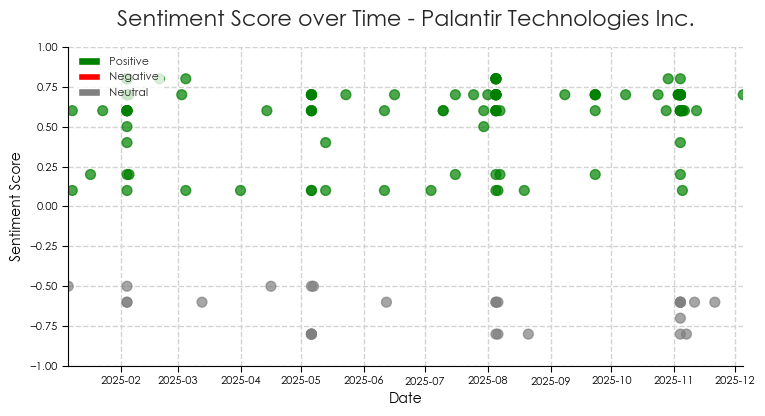

In [5]:
ss.plot_sentiment_score_over_time(df_scored, name, upper_threshold=upper_threshold, lower_threshold=lower_threshold)

In [6]:
daily_sent = ss.build_daily_sentiment(
    df_scored,
    date_col="date",
    score_col="sentiment_score",
    agg="mean",
)

last_date = df_scored['date'].max()
first_date = df_scored['date'].min()
signal_df = ss.build_trading_signal_from_sentiment(daily_sent, long_threshold=upper_threshold, short_threshold=lower_threshold)

price_df = ss.download_price_data(ticker, start=first_date.strftime("%Y-%m-%d"), end=last_date.strftime("%Y-%m-%d"))

bt_df = ss.backtest_sentiment_strategy(price_df, signal_df, cost_bps=1.0, price_col="Close")

[*********************100%***********************]  1 of 1 completed


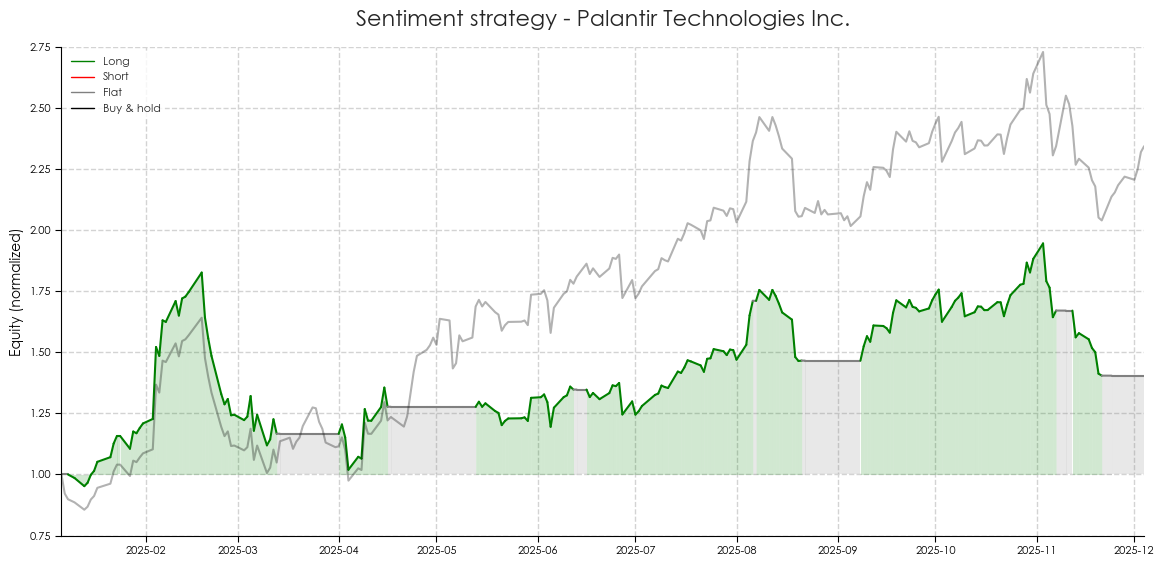

In [7]:
ss.plot_equity_colored_by_position(bt_df, name)